In [2]:
% load_ext rpy2.ipython

In [3]:
%%R
library("phyloseq")
library(ggplot2)

In [4]:
%%R
physeq = import_biom("../../SeqData/otu_table.tax.meta.biom", parseFunction = parse_taxonomy_greengenes, tree = "../../SeqData/trees/fulltree.tre")

In [6]:
%%R
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 5452 taxa and 72 samples ]
sample_data() Sample Data:       [ 72 samples by 3 sample variables ]
tax_table()   Taxonomy Table:    [ 5452 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 5452 tips and 5450 internal nodes ]


In [8]:
%%R
# Normalizes the sample counts by the total - i.e., reporting what fraction of each sample each OTU makes up.
ps_snorm = transform_sample_counts(physeq, function(x) x / sum(x))

In [28]:
%%R
# Computing the Bray d#istance matrix and NMDS in parallel

#ord.full = ordinate(ps_snorm, method = "NMDS", distance = "bray", weighted=TRUE, k=3, trymax=40)
ord.full = ordinate(ps_snorm, method = "PCoA", distance = "unifrac", weighted=TRUE)
# Consider trymax= and k=3

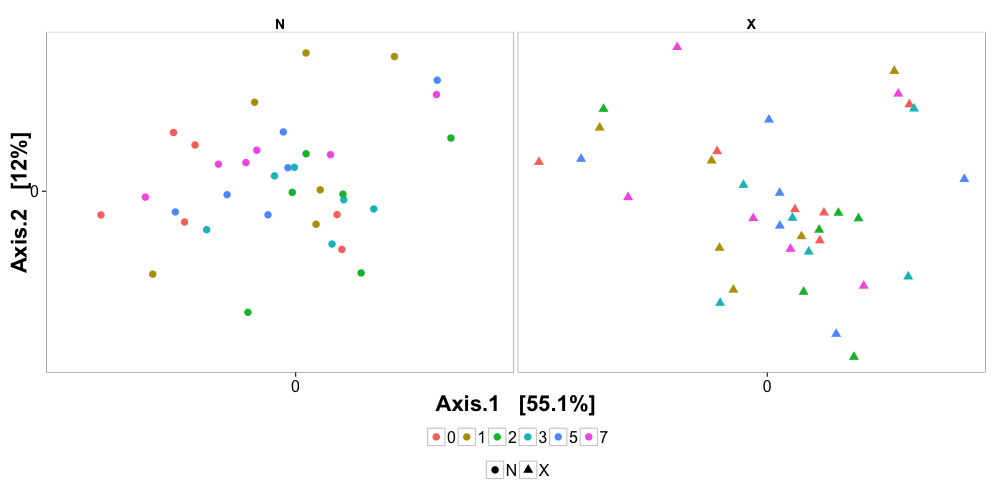

In [30]:
%%R -h 500 -w 1000
D <- ord.full
# Sets the relevant ordination

sample_data(ps_snorm)$Cosm=as.factor(sample_data(ps_snorm)$Cosm)
sample_data(ps_snorm)$Day=as.factor(sample_data(ps_snorm)$Day)

# Creates an plot object, using the df.sites data, with the x and y axes specified as the PCoA axes,
p = plot_ordination(ps_snorm, D, color = "Day", shape = "Trtmt", axes=c(1,2))
#p = plot_ordination(ps_snorm, D, color = "Day", shape = "Trtmt")

# Determines the size of the symbols
p = p  + geom_point(size=3.5) 
#+ scale_colour_manual(values=c("skyblue3","darkorange","chartreuse4","red3","black","gold1"))

p = p + guides(colour = guide_legend(""), shape = guide_legend(""))
#p = p + scale_shape_manual(values=c(19,4,17,15,3))

p = p + scale_x_continuous(breaks=c(-4,-3,-2,-1,0,1))
p = p + scale_y_continuous(breaks=c(-1,0,1))

p = p + theme_bw() +
  theme(
      legend.position = "bottom",
    plot.background = element_blank()
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
    ,strip.text.x = element_text(size=14, face="bold"),
        axis.title = element_text(size=22, face="bold"),
        axis.text = element_text(size=16),
        legend.text = element_text(size=16),
        legend.title = element_text(size = 22),
        strip.background = element_rect(colour="white", fill="white"))

p = p + facet_wrap(~Trtmt)
# Adds a "facet_wrap" to it, which means it will plot it separately by whatever we specify - here, Days

p